# Heart Disease Data
## Eduardo Enrique Trujillo Ramos
## Markus Hartmann

Data retrieved from Kaggle data [Heart disease](https://www.kaggle.com/ronitf/heart-disease-uci/version/1)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from textwrap import wrap

# sns.set(style="white", context="talk")

color_healthy = '#8dc0b1'
color_disease = '#f3e0d2'
color_male = '#96c2e3'
color_female = '#e396c2'

In [2]:
data = pd.read_csv('heart.csv')
column_names = data.columns

df = pd.DataFrame({'country': np.repeat('USA', data['age'].size)})
data = pd.concat([data, df], axis=1)
data['cp'] = data['cp'].apply(lambda x: x + 1)

hungary_data = pd.read_csv('processed.hungarian.data', na_values='?', header=None, names=column_names)
df = pd.DataFrame({'country': np.repeat('Hungary', hungary_data['age'].size)})
hungary_data = pd.concat([hungary_data, df], axis=1)

va_data = pd.read_csv('processed.va.data', na_values='?', header=None, names=column_names)
df = pd.DataFrame({'country': np.repeat('USA', va_data['age'].size)})
va_data = pd.concat([va_data, df], axis=1)

swiss_data = pd.read_csv('processed.switzerland.data', na_values='?', header=None, names=column_names)
df = pd.DataFrame({'country': np.repeat('Switzerland', swiss_data['age'].size)})
swiss_data = pd.concat([swiss_data, df], axis=1)

data = data.append(hungary_data).append(va_data).append(swiss_data)

# The datasets from outside of Cleveland have a value in target from 0-4 where 0 is no disease
# and the rest is disease. We need to process that
data['target'] = data['target'].apply(lambda x: int(x > 0))

data = data.drop('slope', axis=1).drop('ca', axis=1).drop('thal', axis=1)

# Also we have a lot of nan, we'll just remove them
data = data.dropna()

diseased_patients = data[data['target'] == 1]
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,country
0,63,1,4,145.0,233.0,1.0,0.0,150.0,0.0,2.3,1,USA
1,37,1,3,130.0,250.0,0.0,1.0,187.0,0.0,3.5,1,USA
2,41,0,2,130.0,204.0,0.0,0.0,172.0,0.0,1.4,1,USA
3,56,1,2,120.0,236.0,0.0,1.0,178.0,0.0,0.8,1,USA
4,57,0,1,120.0,354.0,0.0,1.0,163.0,1.0,0.6,1,USA


## Description of data
Attribute Information: 
1. Age: Age of the patient in years 
2. Sex: 1 for male and 0 for female 
3. Cp: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic) 
4. Trestbps: Resting blood pressure in mm Hg on admission to the hospital 
5. Chol: Serum cholestoral in mg/dl 
6. Fbs: Fasting blood sugar greater than 120 mg/dl
7. Restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T, 2 = hypertrophy)
8. Thalach: Maximum heart rate achieved 
9. Exang: Exercise induced angina (yes or no)
10. Oldpeak = ST depression induced by exercise relative to rest 
11. Slope: The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
12. Ca: Number of major vessels (0-3) colored by flourosopy 
13. Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. Target: 1 is having a heart disease, 0 is not

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,53.067568,0.766216,2.739189,132.727027,219.960811,0.150000,0.445946,138.760811,0.400000,0.894324,0.552703
std,9.421036,0.423523,1.162485,18.559011,93.577057,0.357313,0.575595,25.863822,0.490229,1.087160,0.497551
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-1.000000,0.000000
25%,46.000000,1.000000,2.000000,120.000000,197.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,231.000000,0.000000,0.000000,140.000000,0.000000,0.500000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.250000,0.000000,1.000000,159.250000,1.000000,1.500000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [4]:
data[data['cp'] == 4]['cp'].size

271

## Data Exploration

### Age distribution

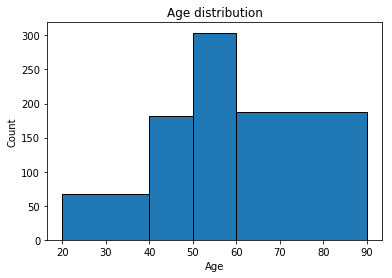

In [5]:
plt.hist(data['age'], bins=[20,40,50,60,90], edgecolor='k')
plt.title('Age distribution')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

### Sex distribution

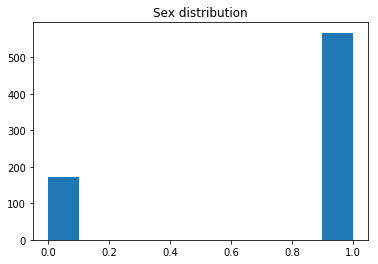

In [6]:
plt.hist(data['sex'])
plt.title('Sex distribution')
plt.show()

## Data relationships

### Relationship between sex and disease

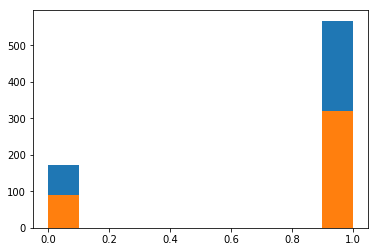

In [7]:
plt.hist(data['sex'])
plt.hist(diseased_patients['sex'])
plt.show()

### Relationship between the age and heart disease

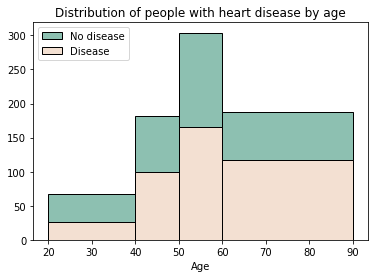

In [8]:
plt.hist(data['age'], bins=[20,40,50,60,90], edgecolor='k', label='No disease', color=color_healthy)
plt.hist(diseased_patients['age'], bins=[20,40,50,60,90], edgecolor='k', label='Disease', color=color_disease)
plt.xlabel('Age')
plt.gca().legend(loc='upper left')
plt.title('Distribution of people with heart disease by age')
plt.show()

In [9]:
age_ranges = [(20,39),(40,49),(50,59),(60,90)]
age_ranges_stats = np.array([])
for age_low, age_high in age_ranges:
    subset = data[data['age'].between(age_low, age_high)]
    total = subset['age'].size
    sick = subset[subset['target'] == 1]['age'].size
    age_ranges_stats = np.append(age_ranges_stats, [sick/total])
    print(f'People with age between {age_low}-{age_high}:\nTotal: {total}\nDisease: {sick}\nPercentage: {sick/total*100:.1f}%\n')


People with age between 20-39:
Total: 67
Disease: 26
Percentage: 38.8%

People with age between 40-49:
Total: 182
Disease: 100
Percentage: 54.9%

People with age between 50-59:
Total: 304
Disease: 166
Percentage: 54.6%

People with age between 60-90:
Total: 187
Disease: 117
Percentage: 62.6%



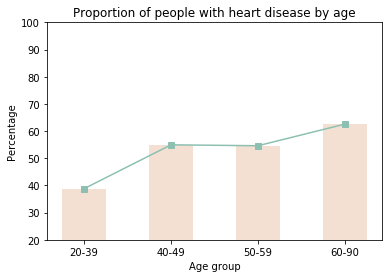

In [10]:
plt.plot(np.arange(0, len(age_ranges), step=1), [x*100 for x in age_ranges_stats], 's-', color=color_healthy)
plt.bar(np.arange(0, len(age_ranges), step=1), [x*100 for x in age_ranges_stats], width=0.5 ,align='center', color=color_disease)
plt.ylim(20,100)
plt.xticks(np.arange(len(age_ranges)), [f'{x[0]}-{x[1]}' for x in age_ranges])
plt.title('Proportion of people with heart disease by age')
plt.xlabel('Age group')
plt.ylabel('Percentage')
plt.show()

In [11]:
age_ranges = [(20,29), (30,39),(40,49),(50,59),(60,69), (70,90)]
age_ranges_stats = np.array([])
age_ranges_counts = np.array([])
for age_low, age_high in age_ranges:
    subset = data[data['age'].between(age_low, age_high)]
    total = subset['age'].size
    sick = subset[subset['target'] == 1]['age'].size
    age_ranges_stats = np.append(age_ranges_stats, sick/total*100)
    age_ranges_counts = np.append(age_ranges_counts, total)
    print(f'People with age between {age_low}-{age_high}:\nTotal: {total}\nDisease: {sick}\nPercentage: {sick/total*100:.1f}%\n')


People with age between 20-29:
Total: 3
Disease: 1
Percentage: 33.3%

People with age between 30-39:
Total: 64
Disease: 25
Percentage: 39.1%

People with age between 40-49:
Total: 182
Disease: 100
Percentage: 54.9%

People with age between 50-59:
Total: 304
Disease: 166
Percentage: 54.6%

People with age between 60-69:
Total: 164
Disease: 99
Percentage: 60.4%

People with age between 70-90:
Total: 23
Disease: 18
Percentage: 78.3%



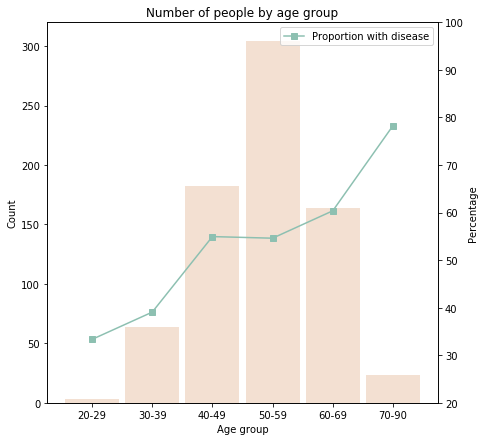

In [12]:
x_axis = np.arange(0, len(age_ranges), step=1)

fig, ax1 = plt.subplots(figsize=(7,7))


ax1.bar(x_axis, age_ranges_counts, width=0.9 ,align='center', color=color_disease)
ax1.set_ylim(0, 320)
ax1.set_ylabel('Count')
ax1.set_xticks(x_axis)
ax1.set_xticklabels([f'{x[0]}-{x[1]}' for x in age_ranges])
ax1.set_xlabel('Age group')

ax2 = ax1.twinx()

ax2.plot(x_axis, age_ranges_stats, 's-', color=color_healthy, label='Proportion with disease')
ax2.set_ylim(20,100)
ax2.set_ylabel('Percentage')

plt.legend()
plt.title('Number of people by age group')
plt.show()

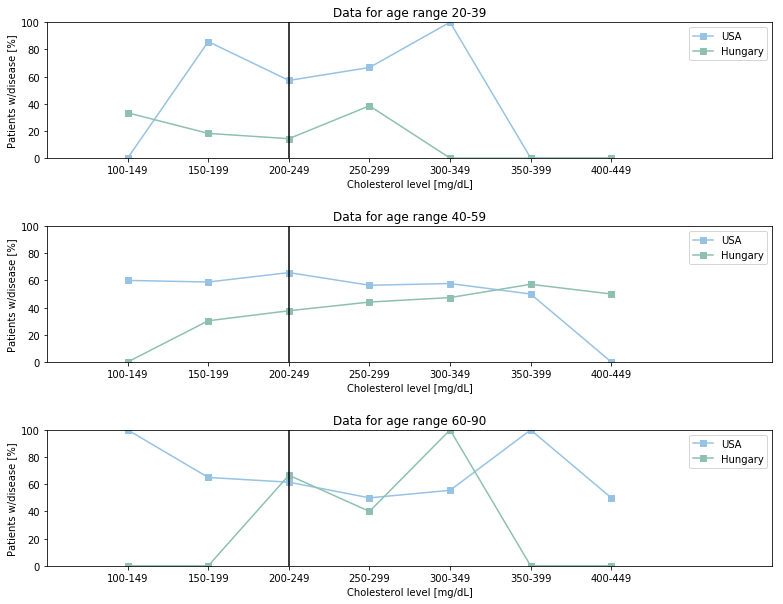

In [39]:
countries = ['USA', 'Hungary']
age_ranges = [(20,39),(40,59),(60,90)]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(13,10))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

chol_groups = [(100, 149),(150,199),(200,249),(250,299),(300,349),(350, 399),(400,449)]
colors = [color_male, color_healthy]

for age_range, ax in zip(age_ranges, axs.flat):
    subset_by_age = data[data['age'].between(age_range[0], age_range[1])]
    for country, color in zip(countries, colors):
        subset_country = subset_by_age[subset_by_age['country'] == country]
        chol_percentage = np.array([])
        for lo, hi in chol_groups:
            count = subset_country[subset_country['chol'].between(lo, hi)]['age'].size
            sick_subset = subset_country[subset_country['chol'].between(lo, hi)]
            sick_subset = sick_subset[sick_subset['target'] == 1]
            sick = sick_subset['age'].size
            if count == 0:
                count = 1
            chol_percentage = np.append(chol_percentage, sick/count*100)
        ax.plot(np.arange(len(chol_groups)), chol_percentage, 's-', label=country, color=color)
    ax.set_title(f'Data for age range {age_range[0]}-{age_range[1]}')
    ax.set_ylim(0, 100)
    ax.set_xlim(-1, len(chol_groups)+1)
    ax.set_xticks(np.arange(len(chol_groups)))
    ax.set_xticklabels([f'{x[0]}-{x[1]}' for x in chol_groups])
    ax.set_xlabel('Cholesterol level [mg/dL]')
    ax.set_ylabel('Patients w/disease [%]')
    ax.axvline(2, color='#000000')
    ax.legend()

plt.show()


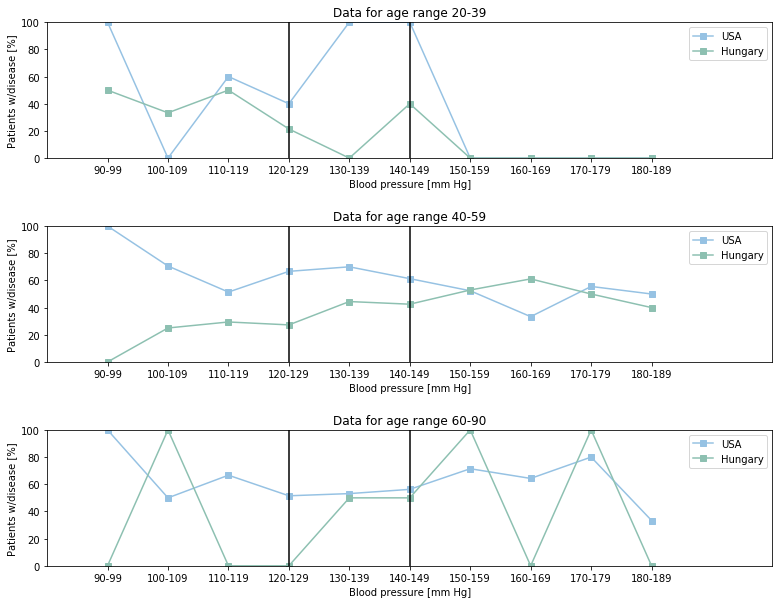

In [42]:
countries = ['USA', 'Hungary']
age_ranges = [(20,39),(40,59),(60,90)]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(13,10))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

bps_groups = [(x, x+9) for x in np.arange(90,190, step=10)]
colors = [color_male, color_healthy]

for age_range, ax in zip(age_ranges, axs.flat):
    subset_by_age = data[data['age'].between(age_range[0], age_range[1])]
    for country, color in zip(countries, colors):
        subset_country = subset_by_age[subset_by_age['country'] == country]
        bps_percentage = np.array([])
        for lo, hi in bps_groups:
            count = subset_country[subset_country['trestbps'].between(lo, hi)]['age'].size
            sick_subset = subset_country[subset_country['trestbps'].between(lo, hi)]
            sick_subset = sick_subset[sick_subset['target'] == 1]
            sick = sick_subset['age'].size
            if count == 0:
                count = 1
            bps_percentage = np.append(bps_percentage, sick/count*100)
        ax.plot(np.arange(len(bps_groups)), bps_percentage, 's-', label=country, color=color)
    ax.set_title(f'Data for age range {age_range[0]}-{age_range[1]}')
    ax.set_ylim(0, 100)
    ax.set_xlim(-1, len(bps_groups)+1)
    ax.set_xticks(np.arange(len(bps_groups)))
    ax.set_xticklabels([f'{x[0]}-{x[1]}' for x in bps_groups])
    ax.set_xlabel('Blood pressure [mm Hg]')
    ax.set_ylabel('Patients w/disease [%]')
    ax.axvline(3, color='k')
    ax.axvline(5, color='k')
    ax.legend()

plt.show()

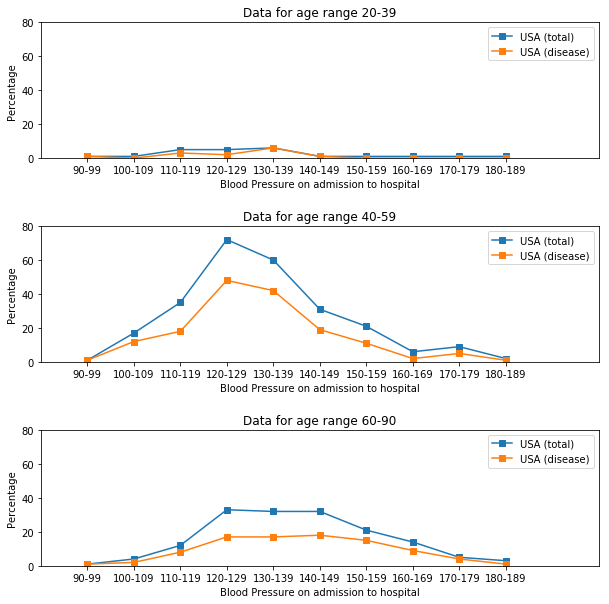

In [15]:
countries = ['USA', 'Switzerland', 'Hungary']
countries = ['USA']
age_ranges = [(20,39),(40,59),(60,90)]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

bps_groups = [(x, x+9) for x in np.arange(90,190, step=10)]

for age_range, ax in zip(age_ranges, axs.flat):
    subset_by_age = data[data['age'].between(age_range[0], age_range[1])]
    for country in countries:
        subset_country = subset_by_age[subset_by_age['country'] == country]
        bps_percentage = np.array([])
        arr = np.array([])
        for lo, hi in bps_groups:
            count = subset_country[subset_country['trestbps'].between(lo, hi)]['age'].size
            sick_subset = subset_country[subset_country['trestbps'].between(lo, hi)]
            sick_subset = sick_subset[sick_subset['target'] == 1]
            sick = sick_subset['age'].size
            if count == 0:
                count = 1
            bps_percentage = np.append(bps_percentage, sick)
            arr = np.append(arr, count)
        ax.plot(np.arange(len(bps_groups)), arr, 's-', label=f'{country} (total)')
        ax.plot(np.arange(len(bps_groups)), bps_percentage, 's-', label=f'{country} (disease)')
    ax.set_title(f'Data for age range {age_range[0]}-{age_range[1]}')
    ax.set_ylim(0, 80)
    ax.set_xlim(-1, len(bps_groups)+1)
    ax.set_xticks(np.arange(len(bps_groups)))
    ax.set_xticklabels([f'{x[0]}-{x[1]}' for x in bps_groups])
    ax.set_xlabel('Blood Pressure on admission to hospital')
    ax.set_ylabel('Percentage')
    ax.legend()

plt.show()

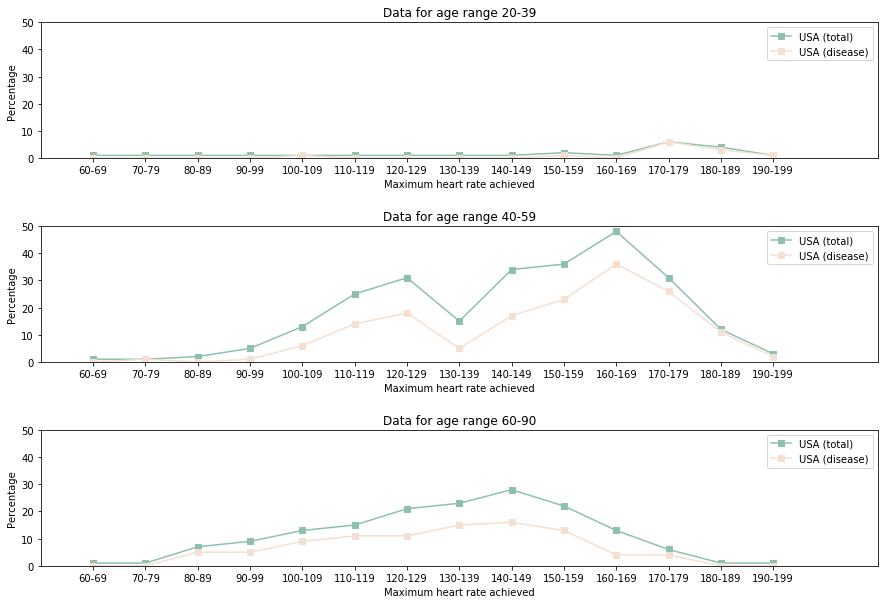

In [16]:
countries = ['USA', 'Switzerland', 'Hungary']
countries = ['USA']
age_ranges = [(20,39),(40,59),(60,90)]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

bps_groups = [(x, x+9) for x in np.arange(60,200, step=10)]

for age_range, ax in zip(age_ranges, axs.flat):
    subset_by_age = data[data['age'].between(age_range[0], age_range[1])]
    for country in countries:
        subset_country = subset_by_age[subset_by_age['country'] == country]
        bps_percentage = np.array([])
        arr = np.array([])
        for lo, hi in bps_groups:
            count = subset_country[subset_country['thalach'].between(lo, hi)]['age'].size
            sick_subset = subset_country[subset_country['thalach'].between(lo, hi)]
            sick_subset = sick_subset[sick_subset['target'] == 1]
            sick = sick_subset['age'].size
            if count == 0:
                count = 1
            bps_percentage = np.append(bps_percentage, sick)
            arr = np.append(arr, count)
        ax.plot(np.arange(len(bps_groups)), arr, 's-', label=f'{country} (total)', color=color_healthy)
        ax.plot(np.arange(len(bps_groups)), bps_percentage, 's-', label=f'{country} (disease)', color=color_disease)
    ax.set_title(f'Data for age range {age_range[0]}-{age_range[1]}')
    ax.set_ylim(0, 50)
    ax.set_xlim(-1, len(bps_groups)+1)
    ax.set_xticks(np.arange(len(bps_groups)))
    ax.set_xticklabels([f'{x[0]}-{x[1]}' for x in bps_groups])
    ax.set_xlabel('Maximum heart rate achieved')
    ax.set_ylabel('Percentage')
    ax.legend()

plt.show()

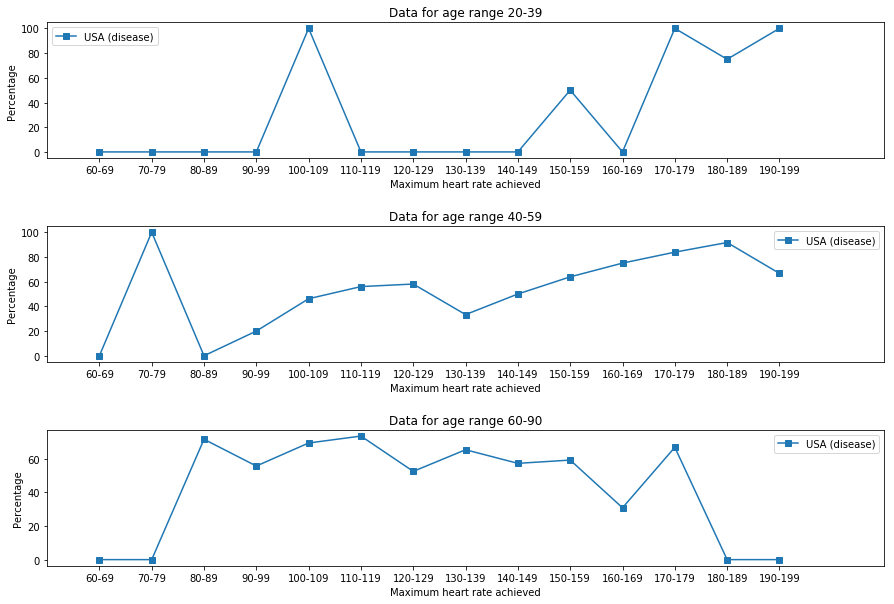

In [17]:
countries = ['USA', 'Switzerland', 'Hungary']
countries = ['USA']
age_ranges = [(20,39),(40,59),(60,90)]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
fig.subplots_adjust(hspace=0.5, wspace=0.1)

bps_groups = [(x, x+9) for x in np.arange(60,200, step=10)]

for age_range, ax in zip(age_ranges, axs.flat):
    subset_by_age = data[data['age'].between(age_range[0], age_range[1])]
    for country in countries:
        subset_country = subset_by_age[subset_by_age['country'] == country]
        bps_percentage = np.array([])
        arr = np.array([])
        for lo, hi in bps_groups:
            count = subset_country[subset_country['thalach'].between(lo, hi)]['age'].size
            sick_subset = subset_country[subset_country['thalach'].between(lo, hi)]
            sick_subset = sick_subset[sick_subset['target'] == 1]
            sick = sick_subset['age'].size
            if count == 0:
                count = 1
            bps_percentage = np.append(bps_percentage, sick/count*100)
            arr = np.append(arr, count)
        ax.plot(np.arange(len(bps_groups)), bps_percentage, 's-', label=f'{country} (disease)')
    ax.set_title(f'Data for age range {age_range[0]}-{age_range[1]}')
    # ax.set_ylim(0, 100)
    ax.set_xlim(-1, len(bps_groups)+1)
    ax.set_xticks(np.arange(len(bps_groups)))
    ax.set_xticklabels([f'{x[0]}-{x[1]}' for x in bps_groups])
    ax.set_xlabel('Maximum heart rate achieved')
    ax.set_ylabel('Percentage')
    ax.legend()

plt.show()

### Relationship between disease and cholesterol

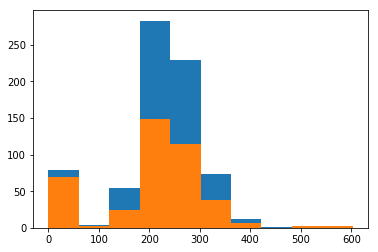

In [18]:
plt.hist(data['chol'])
plt.hist(diseased_patients['chol'])
plt.show()

### Relationship between age and cholesterol

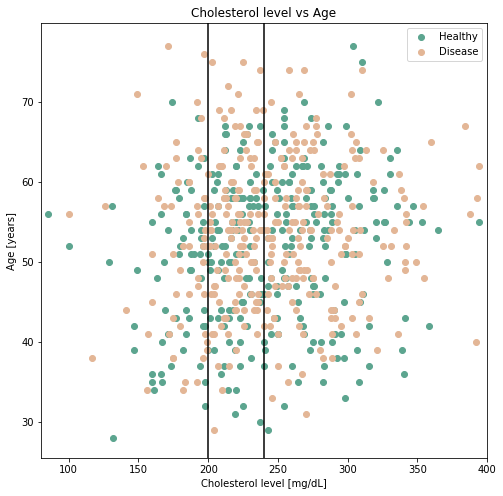

In [19]:
# People with disease will be a red dot and healthy people a blue dot
subset = data[data['chol'] > 0]
subset_healthy = subset[subset['target'] == 0]
subset_disease = subset[subset['target'] == 1]
plt.figure(figsize=(8,8))
plt.scatter(subset_healthy['chol'], subset_healthy['age'], c='#5ca58f', label='Healthy')
plt.scatter(subset_disease['chol'], subset_disease['age'], c='#e3b696', label='Disease')

plt.title('Cholesterol level vs Age')
plt.xlabel('Cholesterol level [mg/dL]')
plt.ylabel('Age [years]')
plt.xticks(np.arange(100, 600, step=50))
plt.axvline(200, color='#000000')
plt.axvline(240, color='#000000')
plt.xlim(80, 400)
plt.legend()
plt.show()

### Relationship between blood sugar, cholesterol and heart disease

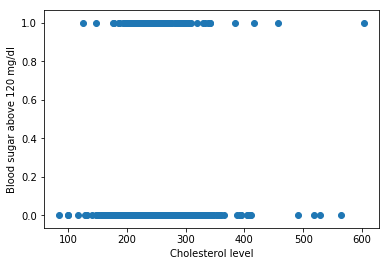

In [21]:
plt.scatter(subset['chol'], subset['fbs'])
plt.xlabel('Cholesterol level')
plt.ylabel('Blood sugar above 120 mg/dl')
plt.show()

Not really good to see anything.

## Let's plot everything against the disease!

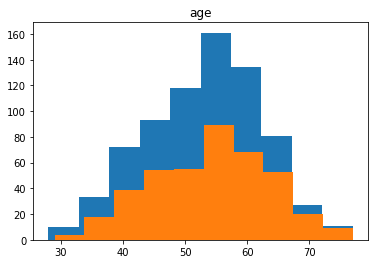

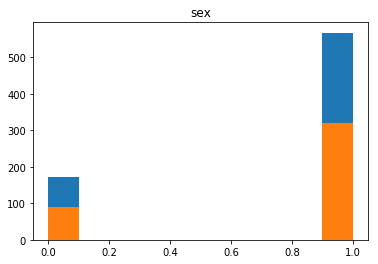

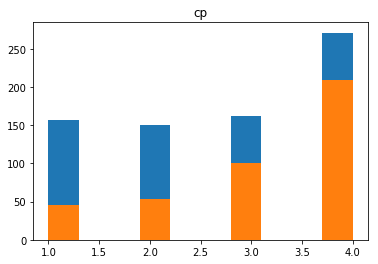

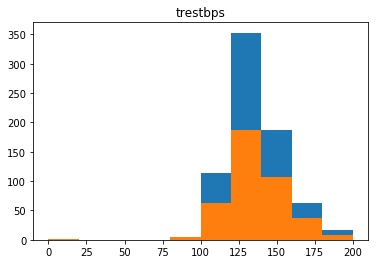

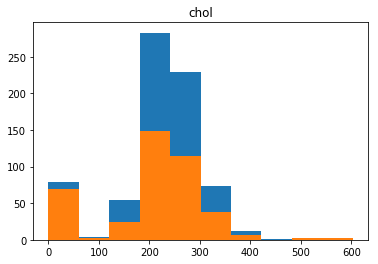

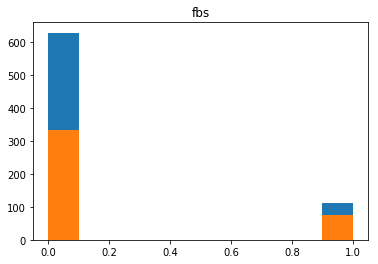

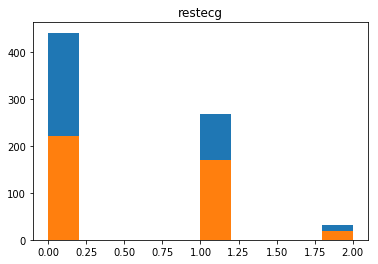

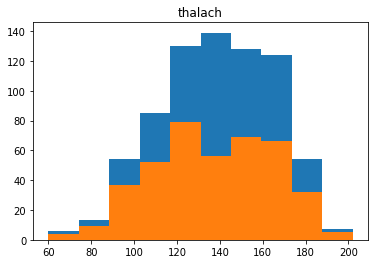

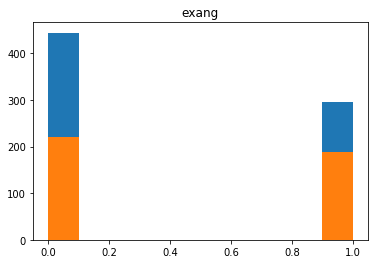

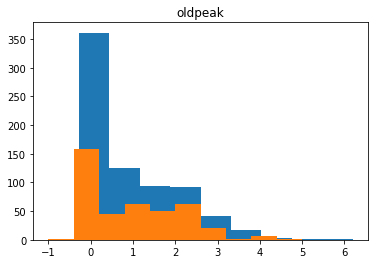

In [22]:
for attr in data.drop('target', axis=1).drop('country', axis=1).columns:
    plt.title(attr)
    plt.hist(data[attr])
    plt.hist(diseased_patients[attr])
    plt.show()

### What if we separate per age groups?
Let's plot everything again but only for people around 55 and 65

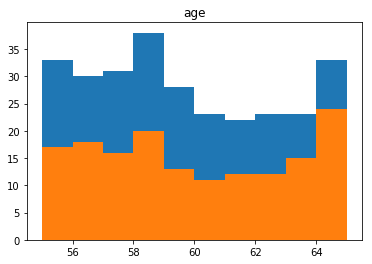

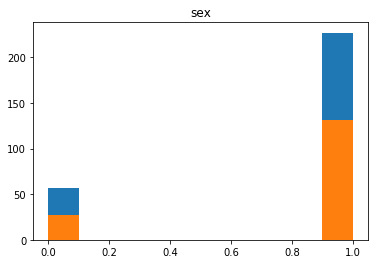

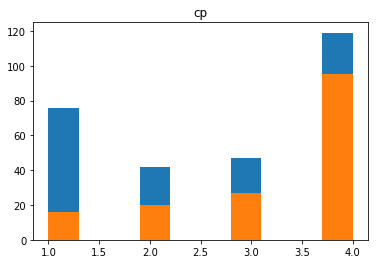

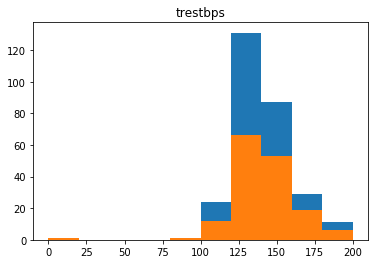

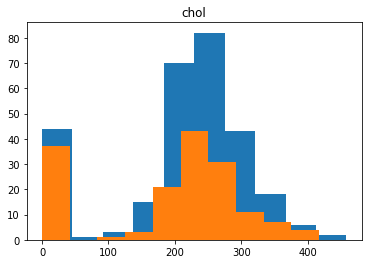

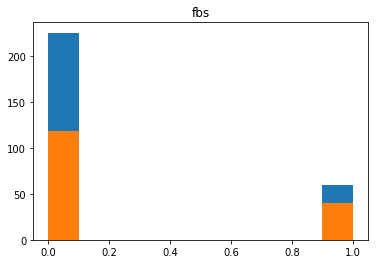

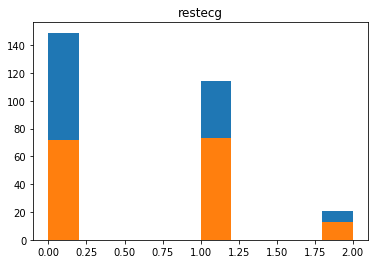

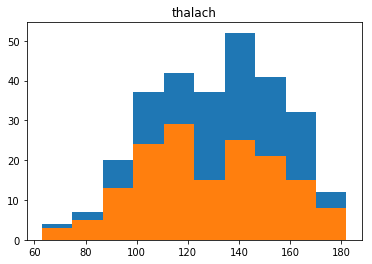

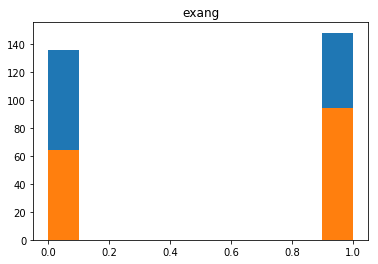

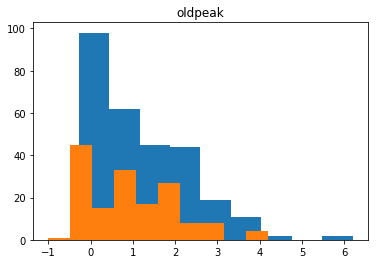

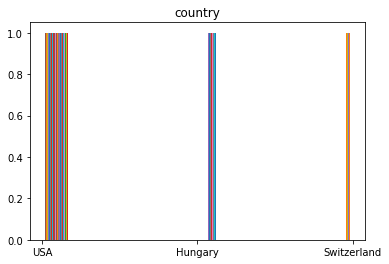

In [23]:
people_age_55_65 = data[data['age'].between(55, 65)]
diseased_patients_55_65 = people_age_55_65[people_age_55_65['target'] == 1]

for attr in people_age_55_65.drop('target', axis=1).columns:
    plt.title(attr)
    plt.hist(people_age_55_65[attr])
    plt.hist(diseased_patients_55_65[attr])
    plt.show()

We see that a lot of patients whose chest pain is a typical angina do not have a heart disease, so let's see how it works when we remove that portion of patients

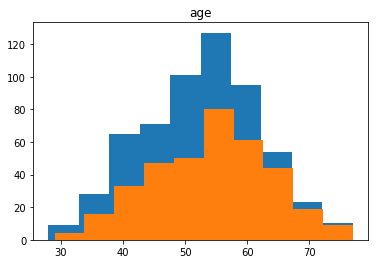

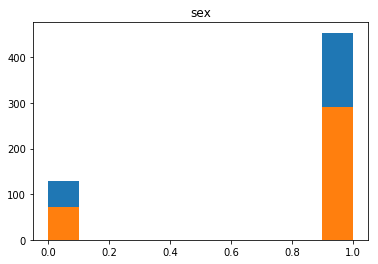

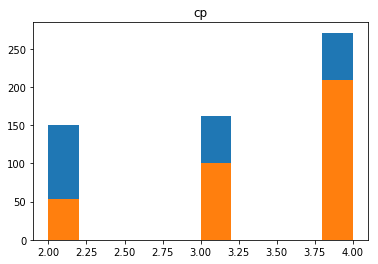

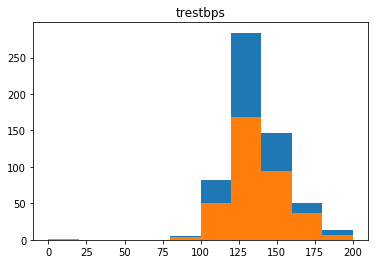

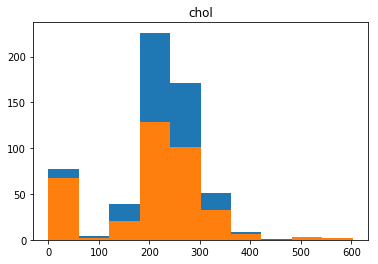

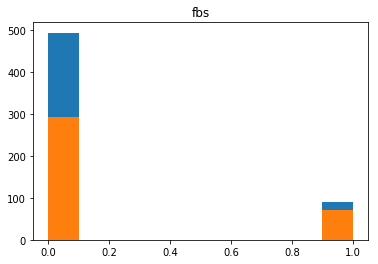

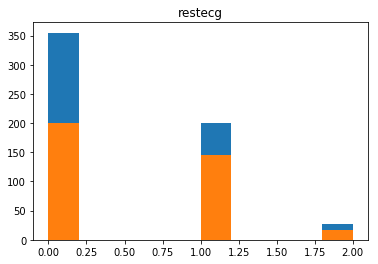

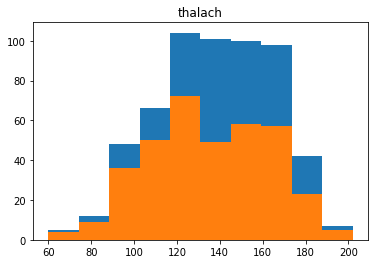

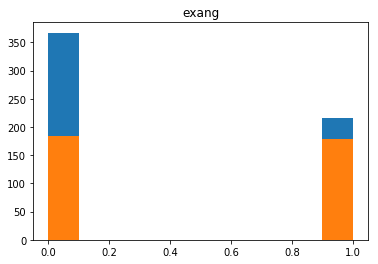

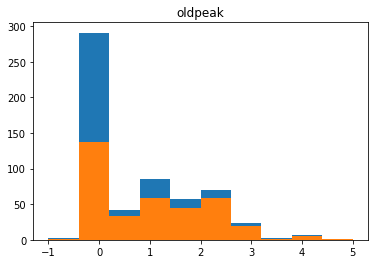

In [24]:
people_cp_gt_1 = data[data['cp'] > 1].drop('country', axis=1)
diseased_patients_cp_gt_1 = people_cp_gt_1[people_cp_gt_1['target'] == 1]

for attr in people_cp_gt_1.drop('target', axis=1).columns:
    plt.title(attr)
    plt.hist(people_cp_gt_1[attr])
    plt.hist(diseased_patients_cp_gt_1[attr])
    plt.show()

WOW! Things start to look a bit more interesting. Let's compare it with people who have chest pain as typical angina and see what do they have that make them have heart disease.

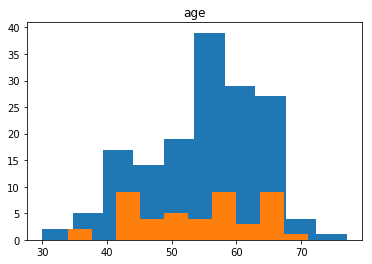

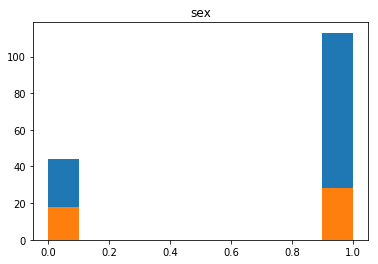

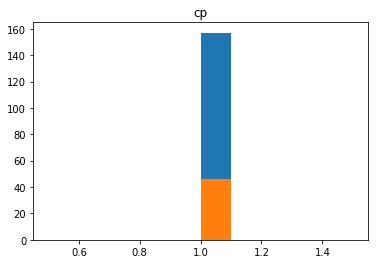

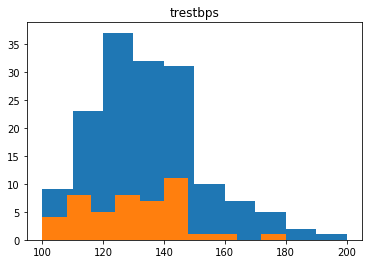

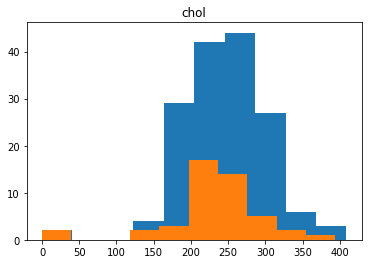

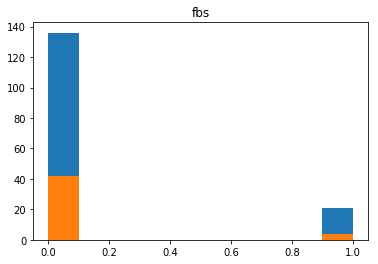

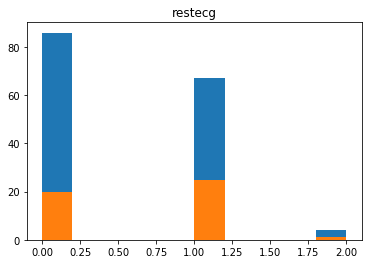

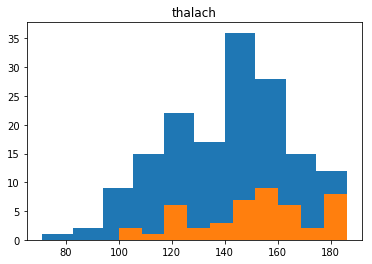

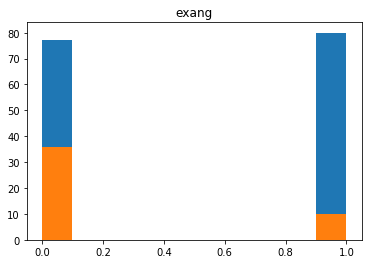

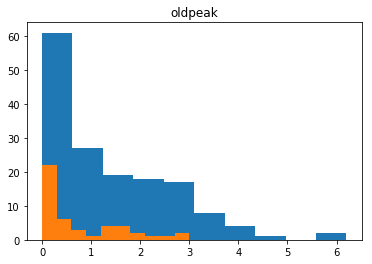

In [25]:
people_cp_eq_1 = data[data['cp'] == 1].drop('country', axis=1)
diseased_patients_cp_eq_1 = people_cp_eq_1[people_cp_eq_1['target'] == 1]

for attr in people_cp_eq_1.drop('target', axis=1).columns:
    plt.title(attr)
    plt.hist(people_cp_eq_1[attr])
    plt.hist(diseased_patients_cp_eq_1[attr])
    plt.show()



## Start doing some classification

We need to understand the data a bit and see how everything works, how good can we detect a heart disease and see what are the most important parameters so that we can focus on them for our visualization

But first, let's split the data

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = data.drop('target', axis=1).drop('country', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Let's start with a Logistic Regression and see how it performs

In [108]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

0.668918918918919
[[38 23]
 [26 61]]


### Now, let's see how a decision tree works with our data set

In [110]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=2460)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

0.6216216216216216
[[38 23]
 [33 54]]


The decision tree did a bit worse than a logistic regression in average, and false negatives are really dangerous in classifying diseases!

### What about a Random Forest Classifier?

In [111]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=64, criterion='gini', random_state=2460)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(accuracy_score(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

0.7162162162162162
[[38 23]
 [19 68]]


Has less false negatives but still not really accurate.

## Visualize data grouping several stuff
### By chest pain

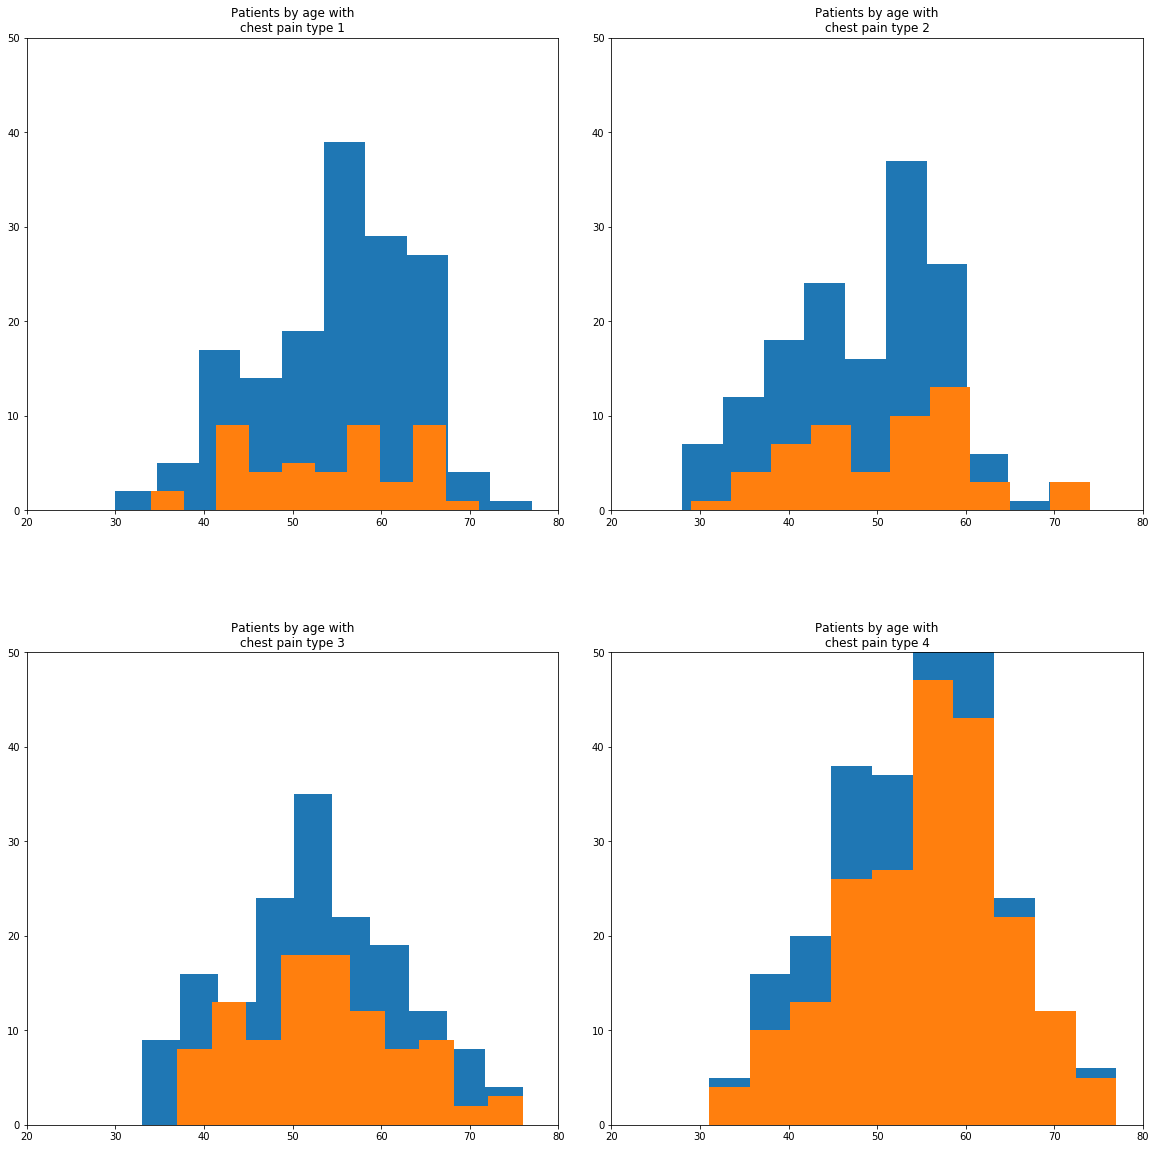

In [30]:
cp_values = [1,2,3,4]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.subplots_adjust(hspace=0.3, wspace=0.1)
for cp_value, ax in zip(cp_values, axs.flat):
    data_cp_value = data[data['cp'] == cp_value]
    data_disease = diseased_patients[diseased_patients['cp'] == cp_value]
    ax.hist(data_cp_value['age'])
    ax.hist(data_disease['age'])
    ax_title = f'Patients by age with chest pain type {cp_value}'
    ax.set_title('\n'.join(wrap(ax_title, 20)))
    ax.set_ylim(0, 50)
    ax.set_xlim(20, 80)

plt.show()

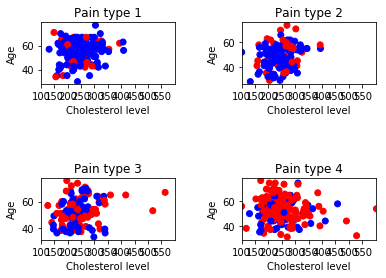

In [31]:
cp_values = [1,2,3,4]
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=1.5, wspace=0.5)
for cp_value, ax in zip(cp_values, axs.flat):
    data_cp_value = data[data['cp'] == cp_value]
    colors = [('b', 'r')[x] for x in data_cp_value['target']]
    ax.scatter(data_cp_value['chol'], data_cp_value['age'], c=colors)
    ax.set_title(f'Pain type {cp_value}')
    ax.set_xlabel('Cholesterol level')
    ax.set_ylabel('Age')
    ax.set_xlim(100, 600)
    ax.set_xticks(np.arange(100, 600, step=50))

plt.show()

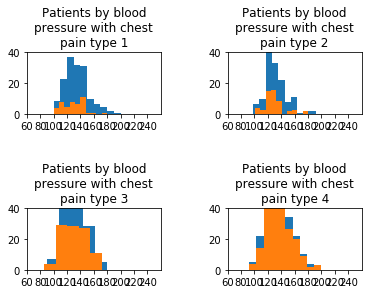

In [32]:
cp_values = [1,2,3,4]
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=1.5, wspace=0.5)
for cp_value, ax in zip(cp_values, axs.flat):
    data_cp_value = data[data['cp'] == cp_value]
    data_disease = diseased_patients[diseased_patients['cp'] == cp_value]
    ax.hist(data_cp_value['trestbps'])
    ax.hist(data_disease['trestbps'])
    ax_title = f'Patients by blood pressure with chest pain type {cp_value}'
    ax.set_title('\n'.join(wrap(ax_title, 20)))
    ax.set_ylim(0, 40)
    ax.set_xlim(60, 260)
    ax.set_xticks(np.arange(60, 260, step=20))

plt.show()

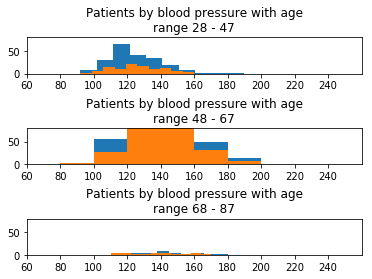

In [33]:
age_groups = np.arange(data['age'].min(), data['age'].max(), step=20)
fig, axs = plt.subplots(nrows=3, ncols=1)
fig.subplots_adjust(hspace=1.5, wspace=0.5)
for age_start, ax in zip(age_groups, axs.flat[:age_groups.size]):
    data_age_value = data[data['age'].between(age_start, age_start + 19)]
    data_disease = diseased_patients[diseased_patients['age'].between(age_start, age_start + 19)]
    ax.hist(data_age_value['trestbps'])
    ax.hist(data_disease['trestbps'])
    ax_title = f'Patients by blood pressure with age range {age_start} - {age_start + 19}'
    ax.set_title('\n'.join(wrap(ax_title, 40)))
    ax.set_ylim(0, 80)
    ax.set_xlim(60, 260)
    ax.set_xticks(np.arange(60, 260, step=20))

plt.show()

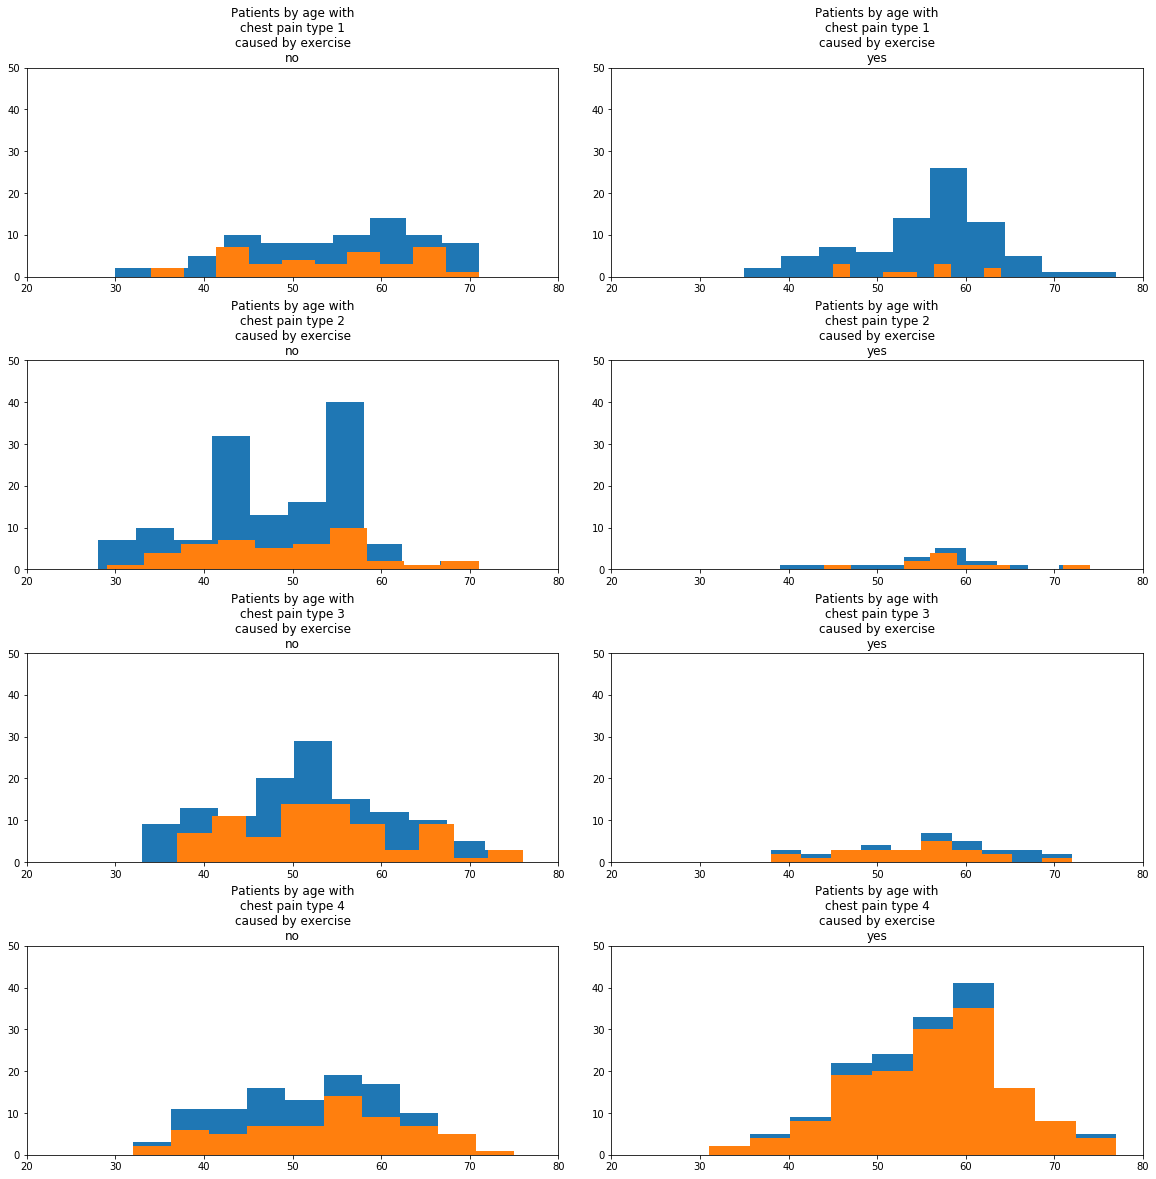

In [34]:
cp_values = [1,2,3,4]
exang_values = [0,1]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.1)
for cp_value, ax_row in zip(cp_values, axs):
    data_cp_value = data[data['cp'] == cp_value]
    data_disease = diseased_patients[diseased_patients['cp'] == cp_value]
    
    for exang_value, ax in zip(exang_values, ax_row):
        data_cp_ang = data_cp_value[data_cp_value['exang'] == exang_value]
        data_disease_ang = data_disease[data_disease['exang'] == exang_value]
        ax.hist(data_cp_ang['age'])
        ax.hist(data_disease_ang['age'])
        ax_title = f'Patients by age with chest pain type {cp_value} caused by exercise {("no", "yes")[exang_value]}'
        ax.set_title('\n'.join(wrap(ax_title, 20)))
        ax.set_ylim(0, 50)
        ax.set_xlim(20, 80)

plt.show()

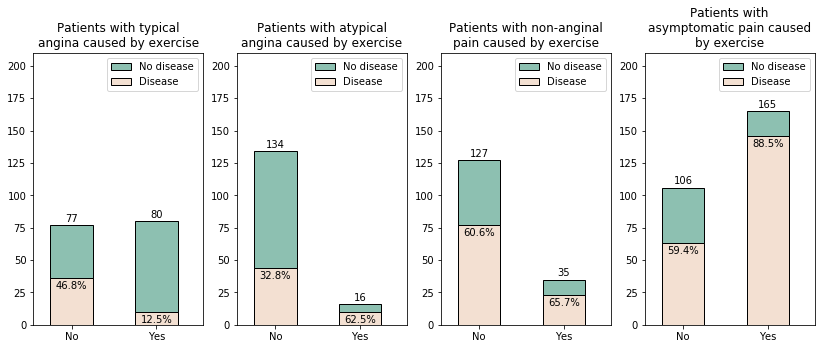

In [9]:
cp_values = [1,2,3,4]
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(14,5))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for cp_value, ax in zip(cp_values, axs.flat):
    data_cp_value = data[data['cp'] == cp_value]
    data_disease = diseased_patients[diseased_patients['cp'] == cp_value]
    ax.hist(data_cp_value['exang'], width=0.5, bins=[0,1,2], edgecolor='k', label='No disease', color=color_healthy)
    ax.hist(data_disease['exang'], width=0.5, bins=[0,1,2], edgecolor='k', label='Disease', color=color_disease)
    ax_title = f'Patients with {("typical angina", "atypical angina", "non-anginal pain", "asymptomatic pain")[cp_value-1]} caused by exercise'
    ax.set_title('\n'.join(wrap(ax_title, 25)))
    ax.set_ylim(0, 210)
    ax.set_xlim(-0.2,1.8)
    ax.set_xticks(np.arange(0.25,2,step=1))
    ax.set_xticklabels(('No', 'Yes'))
    ax.text(0.25, np.sum(data_cp_value['exang'] == 0)+5, str(np.sum(data_cp_value['exang'] == 0)), ha='center', va='center')
    ax.text(0.25, np.sum(data_disease['exang'] == 0)-6, f'{np.sum(data_disease["exang"] == 0)/np.sum(data_cp_value["exang"] == 0)*100:.1f}%', ha='center', va='center')
    ax.text(1.25, np.sum(data_cp_value['exang'] == 1)+5, str(np.sum(data_cp_value['exang'] == 1)), ha='center', va='center')
    ax.text(1.25, np.sum(data_disease['exang'] == 1)-6, f'{np.sum(data_disease["exang"] == 1)/np.sum(data_cp_value["exang"] == 1)*100:.1f}%', ha='center', va='center')
    ax.legend()

plt.show()

## Basic information

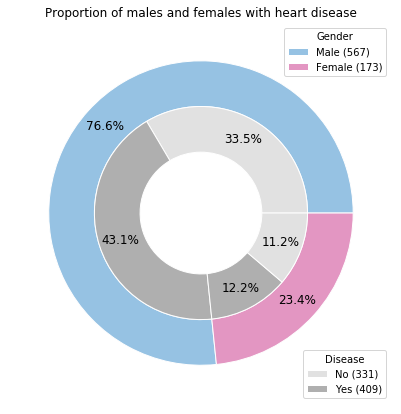

In [36]:
fig, ax = plt.subplots(figsize=(7,7))

size = 0.3

males = np.sum(data['sex'] == 1)
males_disease = np.sum(data[data['sex'] == 1]['target'] == 1)
males_no_disease = males - males_disease

females = np.sum(data['sex'] == 0)
females_disease = np.sum(data[data['sex'] == 0]['target'] == 1)
females_no_disease = females - females_disease

vals = np.array([[males_no_disease, males_disease], [females_disease, females_no_disease]])

outer_colors = np.array([color_male, color_female])
inner_colors = np.array(['#e1e1e1', '#afafaf', '#afafaf', '#e1e1e1'])

def format_label(pct, data):
    absolute = int(pct/100.*np.sum(data))
    return "{:.1f}%".format(pct, absolute)



wedges_gender, _, autotexts_gender = ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct=lambda pct: format_label(pct, vals),
                                  textprops=dict(color="k", fontsize='large'), pctdistance=0.85)

wedges_disease, _, autotexts_disease = ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct=lambda pct: format_label(pct, vals),
                                  textprops=dict(color="k", fontsize='large'), pctdistance=0.8)

ax.legend(wedges_gender, [f'Male ({males})',f'Female ({females})'],
          title="Gender")

from matplotlib.legend import Legend
leg = Legend(ax, wedges_disease, [f'No ({males_no_disease + females_no_disease})', f'Yes ({males_disease + females_disease})'],
             loc='lower right', title='Disease')
ax.add_artist(leg);

ax.set(aspect="equal", title='Proportion of males and females with heart disease')

plt.show()

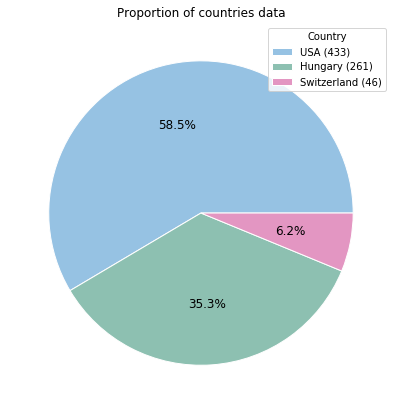

In [86]:
fig, ax = plt.subplots(figsize=(7,7))

usa_count = np.sum(data['country'] == 'USA')

hungary_count = np.sum(data['country'] == 'Hungary')

swiss_count = np.sum(data['country'] == 'Switzerland')

vals = np.array([usa_count, hungary_count, swiss_count])

colors = np.array([color_male, color_healthy, color_female])

def format_label(pct, data):
    absolute = int(pct/100.*np.sum(data))
    return "{:.1f}%".format(pct, absolute)

wedges, _, autotexts_disease = ax.pie(vals, colors=colors,
       wedgeprops=dict(width=size, edgecolor='w'), autopct=lambda pct: format_label(pct, vals),
                                  textprops=dict(color="k", fontsize='large'), pctdistance=0.6)

ax.legend(wedges, [f'USA ({usa_count})',f'Hungary ({hungary_count})', f'Switzerland ({swiss_count})'],
          title="Country")

ax.set(aspect="equal", title='Proportion of countries data')

plt.show()

In [114]:
subset = data[data['country'] == 'USA']
subset = subset[subset['age'].between(40, 59)]
subset = subset[subset['trestbps'].between(100, 109)]
count = subset['age'].size
sick = subset[subset['target'] == 1]['age'].size
print(sick/count*100)

70.58823529411765
